# <font color='blue'>Covid 19 Prediction </font>
### <font color='#739CFF'>CSE381 Final Project </font>
<b>Author:</b> Mohammed Ahmed Abdelmegeed 19P1298

In [20]:
# importing the dataset

import pandas as pd
df = pd.read_csv('data.csv' ,index_col=0)

In [58]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score

## 1. Understanding The Data

Our goal in this project, is to use different types of classifiers such as:
<ol>
    <li>Support Vector Machines</li>
    <li>K-Nearest Neighbours</li>
    <li>Bayes Classifier</li>
    <li>Decision Tree</li>
    <li>Multilayer Perceptron</li>
</ol>
in order to predict if people are affected by COVID-19 using the dataset we have in hand. The dataset that we will work with is going to be divided into 2 parts, the training and testing parts. Using the testing data we can measure the accuracy of each way of classification and compare them between each other.

In [3]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


In [5]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


## 2. Preprocessing

In this part, we are going to go through the process of cleaning the data and preprocessing it, in order to maximize the accuracy of our model. Steps in the preprocessing phase includes checking for outliers, normailizing the data, and finding correlations between features and each other.

### 2.1 Detecting Missing Records

In [21]:
print(df.isnull().sum())

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
result          0
dtype: int64


There were no null values found in our dataset, hence we don't need to fill any missing data

### 2.2 Data Normalization
All features are going to be normalized so that all features are between 0 and 1. This is done so that all the features can have an equal weight when the model training process is taking place. Normalization is going to be carried out using the MinMax scaler, using 0 as the minimum value and 1 as the maximum value. Some fetaures are already 0 and 1, such as the <i>gender</i>, <i>vis_wuhan</i>, and <i>from_wuh</i>.

In [28]:
from sklearn.preprocessing import MinMaxScaler
def scaler(df,arr):
    dataframe_N=df[arr]
    scale = MinMaxScaler(feature_range=(0,1))
    norm_data=scale.fit_transform(dataframe_N)
    return norm_data
df[['age','country','location','diff_sym_hos','symptom1', 'symptom2','symptom3', 'symptom4', 'symptom5','symptom6']]=scaler(df,['age','country','location','diff_sym_hos','symptom1', 'symptom2','symptom3', 'symptom4', 'symptom5','symptom6'])
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0.751825,0.21875,1,0.680851,1,0,0.583333,1.0,1.0,1.0,1.0,1.0,0.65,1
1,0.729927,0.21875,0,0.574468,0,1,0.583333,1.0,1.0,1.0,1.0,1.0,0.25,0
2,0.992701,0.21875,1,0.468085,0,1,0.583333,1.0,1.0,1.0,1.0,1.0,0.90,0
3,0.839416,0.21875,0,0.617021,1,0,0.583333,1.0,1.0,1.0,1.0,1.0,0.25,0
4,0.839416,0.21875,1,0.595745,0,0,0.583333,1.0,1.0,1.0,1.0,1.0,0.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0.065693,0.09375,0,0.504255,0,0,0.583333,1.0,1.0,1.0,1.0,1.0,0.25,0
856,0.065693,0.09375,0,0.504255,0,0,0.583333,1.0,1.0,1.0,1.0,1.0,0.25,0
860,0.014599,0.00000,1,0.504255,0,0,0.583333,1.0,1.0,1.0,1.0,1.0,0.25,0
861,0.167883,0.25000,1,0.504255,0,0,0.583333,1.0,1.0,1.0,1.0,1.0,0.25,0


### 2.3 Visualizing Correlation Between features

Splitting the feature and target

In [29]:
x = df.iloc[:,1:-1] # Features columns
y = df['result'] # Target column

In [30]:
df.corr()['result']

location        0.072283
country        -0.057085
gender          0.090243
age             0.542399
vis_wuhan      -0.172371
from_wuhan      0.108273
symptom1       -0.138109
symptom2       -0.078698
symptom3       -0.059922
symptom4       -0.102976
symptom5        0.025579
symptom6        0.015933
diff_sym_hos    0.200313
result          1.000000
Name: result, dtype: float64

Just by looking at the data above, we can tell immediately that age is the major factor and highly correlated with people with COVID-19. As age increases, it is more likely to be an affected patient.

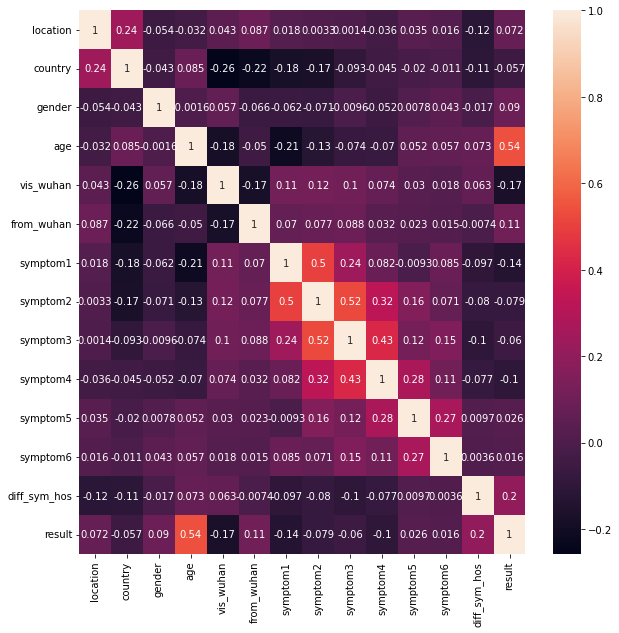

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True)

By looking at the heatmap above, we can conclude that symptom 2 and 3 are moderatley correlated, symptom 1 and 2 are also moderatley correlated. There are no features which are strongly correlated assuming the threshold for strongly correlated features is >0.6.

In [42]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (414, 12)
X_test shape: (139, 12)
X_val shape: (138, 12)
y_train shape: (414,)
y_test shape: (139,)
y_val shape: (138,)


## 3 K-Nearest Neighbour (KNN)
This approach basically receives the input point, and the model is going to classify the point to the cluster with the most neighbours out of the total K neighbours. Deciding the value of K can be challenging because it is the only hyperparameter in this algorithm, but there are 2 ways to find the best value for K. The first way is by using the K-cross validation method, and the second way is by using the formula sqrt(N)/2, where N is the total number of data points or samples.

### 3.1 Using K-Fold Cross Validation
In the following piece of code, we try each value for K from 4 up to 31, and for each value we use 5-folds to calculate the accuracy of the given model. Then we plot the values of K against their acuracy score, to determine the best value for K.

In [54]:
k_values = [i for i in range (4,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

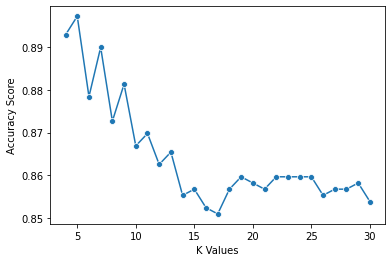

In [55]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

By looking at the chart above, we can conclude that the best value for K is between 5-8.

 ### 3.2 Fitting and evaluating the model

In [67]:
#Set number of K to 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8992805755395683


### 3.3 Evaluation metrics

In [71]:
confusion_matrix(ytest, y_pred)
print(classification_report(ytest, y_pred, target_names=['0','1']))
print(roc_auc_score(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       120
           1       0.17      0.11      0.13        19

    accuracy                           0.81       139
   macro avg       0.52      0.51      0.51       139
weighted avg       0.77      0.81      0.79       139

0.5109649122807017


### 3.4 Plotting ROC/AUC Curve

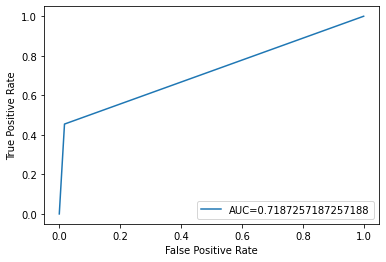

In [76]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()